<a href="https://colab.research.google.com/github/chitinglow/Classification-Machine-learning/blob/master/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description this program optimizes a stock portfolio

# Import python library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
from sklearn import preprocessing
from pandas import set_option
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv'

In [2]:
# Load data 
bankData = pd.read_csv(file_url, sep=';')
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
print(bankData.shape)

(45211, 17)


In [4]:
## Summarizing the statistics of the numerical raw data
bankData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## EDA data analysis


In [5]:
## Create category list

jobList = ['admin', 'scientist', 'doctor', 'management']

## Two categories of the jobs (yes, no)

jobYes = [20,60,70,40]
jobNo = [80,40,30,60]

## Get the length of x axis labels and arranging its indexes

xlabels = len(jobList)
ind = np.arange(xlabels)

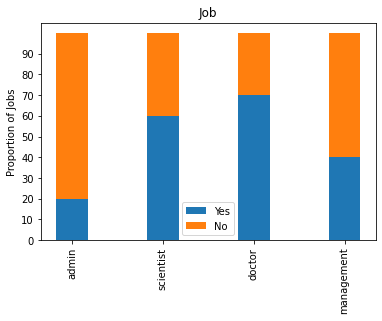

In [6]:
## Width of the bar
width = 0.35

# getting plot
p1 = plt.bar(ind, jobYes, width)
p2 = plt.bar(ind, jobNo, width, bottom=jobYes)
plt.ylabel('Proportion of Jobs')
plt.title("Job")

# X and y labels
plt.xticks(ind, jobList)
plt.yticks(np.arange(0,100,10))

plt.legend((p1[0], p2[0]), ('Yes', 'No'))
plt.xticks(rotation = 90)
plt.show()

In [7]:
## Testing age vs propensity for a term loan
## Count the number of age group

filter_mask = bankData['y'] == 'yes'

bankSub1 = bankData[filter_mask].groupby('age')['y'].agg(agegrp='count').reset_index()

alt.Chart(bankSub1).mark_line().encode(x='age', y='agegrp')

alt.Chart(...)

In [8]:
ageTot = bankData.groupby('age')['y'].agg(ageTot = 'count').reset_index()
ageTot.head()

,age,ageTot
0,18,12
1,19,35
2,20,50
3,21,79
4,22,129


In [9]:
ageProp = bankData.groupby(['age', 'y'])['y'].agg(ageCat = 'count').reset_index()
ageProp.head()

,age,y,ageCat
0,18,no,5
1,18,yes,7
2,19,no,24
3,19,yes,11
4,20,no,35


In [10]:
ageComb = pd.merge(ageProp, ageTot, left_on=['age'], right_on=['age'])
ageComb['catProp'] = (ageComb.ageCat/ageComb.ageTot)*100
ageComb.head()

,age,y,ageCat,ageTot,catProp
0,18,no,5,12,41.666667
1,18,yes,7,12,58.333333
2,19,no,24,35,68.571429
3,19,yes,11,35,31.428571
4,20,no,35,50,70.000000


In [11]:
alt.Chart(ageComb).mark_line().encode(x='age', y='catProp').facet(column='y')

alt.FacetChart(...)

In [12]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
jobTot = bankData.groupby('job')['y'].agg(jobTot='count').reset_index()

In [14]:
jobProp = bankData.groupby(['job', 'y'])['y'].agg(jobCat='count').reset_index()

In [15]:
# Merging both the data frames
jobComb = pd.merge(jobProp, jobTot, on=['job'])
jobComb['catProp'] = (jobComb.jobCat/jobComb.jobTot)*100

jobComb.head()

,job,y,jobCat,jobTot,catProp
0,admin.,no,4540,5171,87.797331
1,admin.,yes,631,5171,12.202669
2,blue-collar,no,9024,9732,92.725031
3,blue-collar,yes,708,9732,7.274969
4,entrepreneur,no,1364,1487,91.728312


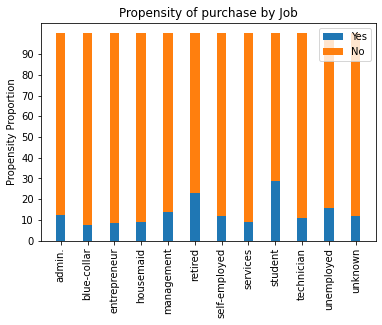

In [16]:
# Create seperate data frames for Yes and No
jobcombYes = jobComb[jobComb['y'] == 'yes']
jobcombNo = jobComb[jobComb['y'] == 'no']

# Get the length of the xaxis labels 
xlabels = jobTot['job'].nunique()

# Get the proportion values 
jobYes = jobcombYes['catProp'].unique()
jobNo = jobcombNo['catProp'].unique()

# Arrange the indexes of x asix
ind = np.arange(xlabels)

# Get the width of each bar
width = 0.35  

# Getting the plots
p1 = plt.bar(ind, jobYes, width)
p2 = plt.bar(ind, jobNo, width,bottom=jobYes)

plt.ylabel('Propensity Proportion')
plt.title('Propensity of purchase by Job')

# Defining the x label indexes and y label indexes
plt.xticks(ind, jobTot['job'].unique())
plt.yticks(np.arange(0, 100, 10))

# Defining the legends
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

# To rotate the axis labels 
plt.xticks(rotation=90)
plt.show()

In [17]:
## Feature enginerring
## Relationship between housing and propensity for term deposits

bankData.groupby(['housing', 'y'])['y'].agg(houseTot='count').reset_index()

,housing,y,houseTot
0,no,no,16727
1,no,yes,3354
2,yes,no,23195
3,yes,yes,1935


In [18]:
bankData.groupby(['loan', 'y'])['y'].agg(loanTot='count').reset_index()

,loan,y,loanTot
0,no,no,33162
1,no,yes,4805
2,yes,no,6760
3,yes,yes,484


In [19]:
## Quantiles

np.quantile(bankData['balance'], [0.25,0.5,0.75])


array([  72.,  448., 1428.])

In [20]:

bankData['balanceClass'] = 'Quant1'

bankData.loc[(bankData['balance'] > 72) & (bankData['balance'] < 448), 'balanceClass'] = 'Quant2'

bankData.loc[(bankData['balance'] > 448) & (bankData['balance'] < 1428), 'balanceClass'] = 'Quant3'

bankData.loc[bankData['balance'] > 1428, 'balanceClass'] = 'Quant4'

bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1


In [21]:
## Calculating customers under each quantile
balanceTot = bankData.groupby(['balanceClass'])['y'].agg(balanceTot = 'count').reset_index()
balanceTot

,balanceClass,balanceTot
0,Quant1,11340
1,Quant2,11275
2,Quant3,11299
3,Quant4,11297


In [22]:
## Calculating the total customers categorised as per quantile and propensity classification

balanceProp = bankData.groupby(['balanceClass', 'y'])['y'].agg(balanceCat = 'count').reset_index()
balanceProp

,balanceClass,y,balanceCat
0,Quant1,no,10517
1,Quant1,yes,823
2,Quant2,no,10049
3,Quant2,yes,1226
4,Quant3,no,9884
5,Quant3,yes,1415
6,Quant4,no,9472
7,Quant4,yes,1825


In [23]:
## Merge

balanceComb = pd.merge(balanceProp, balanceTot, on = ['balanceClass'])
balanceComb['catProp'] =  (balanceComb.balanceCat/balanceComb.balanceTot)*100
balanceComb

,balanceClass,y,balanceCat,balanceTot,catProp
0,Quant1,no,10517,11340,92.742504
1,Quant1,yes,823,11340,7.257496
2,Quant2,no,10049,11275,89.126386
3,Quant2,yes,1226,11275,10.873614
4,Quant3,no,9884,11299,87.476768
5,Quant3,yes,1415,11299,12.523232
6,Quant4,no,9472,11297,83.845269
7,Quant4,yes,1825,11297,16.154731


In [24]:
# Creating new feature from exsiting one
x = bankData[['balance']].values.astype(float)
# Creating the scaling function
minmaxScaler = preprocessing.MinMaxScaler()
# Transforming the balance data by normalising it with minmaxScalre
bankData['balanceTran'] = minmaxScaler.fit_transform(x)
# Printing the head of the data
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092259
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073067
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072822
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086476
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072812


In [25]:
# Adding a small numerical constant to eliminate 0 values

bankData['balanceTran'] = bankData['balanceTran'] + 0.00001
# Let us transform values for loan data
bankData['loanTran'] = 1
# Giving a weight of 5 if there is no loan
bankData.loc[bankData['loan'] == 'no', 'loanTran'] = 5
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5


In [26]:
# Let us transform values for Housing data
bankData['houseTran'] = 5
# Giving a weight of 1 if the customer has a house
bankData.loc[bankData['housing'] == 'no', 'houseTran'] = 1

bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5,1


In [27]:
# Let us now create the new variable which is a product of all these
bankData['assetIndex'] = bankData['balanceTran'] * bankData['loanTran'] * bankData['houseTran']
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112


In [28]:
# Finding the quantile
np.quantile(bankData['assetIndex'],[0.25,0.5,0.75])

array([0.37668646, 0.56920367, 1.9027249 ])

In [29]:
# Creating quantiles from the assetindex data
bankData['assetClass'] = 'Quant1'

bankData.loc[(bankData['assetIndex'] > 0.38) & (bankData['assetIndex'] < 0.57), 'assetClass'] = 'Quant2'

bankData.loc[(bankData['assetIndex'] > 0.57) & (bankData['assetIndex'] < 1.9), 'assetClass'] = 'Quant3'

bankData.loc[bankData['assetIndex'] > 1.9, 'assetClass'] = 'Quant4'

bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112,Quant1


In [30]:
# Calculating total of each asset class
assetTot = bankData.groupby('assetClass')['y'].agg(assetTot='count').reset_index()
# Calculating the category wise counts
assetProp = bankData.groupby(['assetClass', 'y'])['y'].agg(assetCat='count').reset_index()

In [31]:
# Merging both the data frames
assetComb = pd.merge(assetProp, assetTot, on = ['assetClass'])
assetComb['catProp'] = (assetComb.assetCat / assetComb.assetTot)*100
assetComb

,assetClass,y,assetCat,assetTot,catProp
0,Quant1,no,10921,12212,89.428431
1,Quant1,yes,1291,12212,10.571569
2,Quant2,no,8436,10400,81.115385
3,Quant2,yes,1964,10400,18.884615
4,Quant3,no,10144,11121,91.214819
5,Quant3,yes,977,11121,8.785181
6,Quant4,no,10421,11478,90.791079
7,Quant4,yes,1057,11478,9.208921


In [32]:
print(bankData.dtypes)

age               int64
job              object
marital          object
education        object
default          object
balance           int64
housing          object
loan             object
contact          object
day               int64
month            object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
y                object
balanceClass     object
balanceTran     float64
loanTran          int64
houseTran         int64
assetIndex      float64
assetClass       object
dtype: object


In [33]:
bankData.describe()

,age,balance,day,duration,campaign,pdays,previous,balanceTran,loanTran,houseTran,assetIndex
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.085181,4.359094,3.223353,1.179189
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.027643,1.467280,1.987511,0.952080
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000010,1.000000,1.000000,0.000010
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.073467,5.000000,1.000000,0.376686
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.076881,5.000000,5.000000,0.569204
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.085778,5.000000,5.000000,1.902725
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000010,5.000000,5.000000,15.108152


In [34]:
## Correlation matrix
bankNumeric = bankData[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'assetIndex']]
set_option('display.width', 150)
set_option('precision', 3)

bankCorr = bankNumeric.corr(method='pearson')
bankCorr

,age,balance,day,duration,campaign,pdays,previous,assetIndex
age,1.000,0.098,-0.009,-0.005,0.005,-0.024,0.001,-0.112
balance,0.098,1.000,0.005,0.022,-0.015,0.003,0.017,0.311
day,-0.009,0.005,1.000,-0.030,0.162,-0.093,-0.052,-0.019
duration,-0.005,0.022,-0.030,1.000,-0.085,-0.002,0.001,0.017
campaign,0.005,-0.015,0.162,-0.085,1.000,-0.089,-0.033,-0.026
pdays,-0.024,0.003,-0.093,-0.002,-0.089,1.000,0.455,0.101
previous,0.001,0.017,-0.052,0.001,-0.033,0.455,1.000,0.034
assetIndex,-0.112,0.311,-0.019,0.017,-0.026,0.101,0.034,1.000


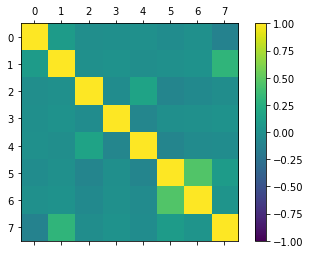

In [35]:
from matplotlib import pyplot
corFig = pyplot.figure()
figAxis = corFig.add_subplot(111)
corAx = figAxis.matshow(bankCorr, vmin = -1, vmax = 1)
corFig.colorbar(corAx)
pyplot.show()

In [36]:
## Check data skewness
bankNumeric.skew()

age            0.685
balance        8.360
day            0.093
duration       3.144
campaign       4.899
pdays          2.616
previous      41.846
assetIndex     1.221
dtype: float64

Text(0.5, 1.0, 'Distribution of asset index')

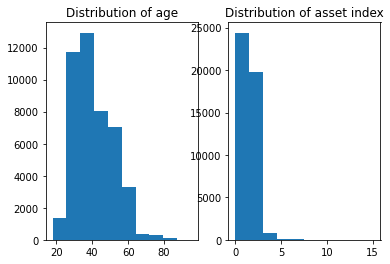

In [37]:
fig, axs = plt.subplots(1,2)
axs[0].hist(bankNumeric['age'])
axs[0].set_title('Distribution of age')
axs[1].hist(bankNumeric['assetIndex'])
axs[1].set_title('Distribution of asset index')

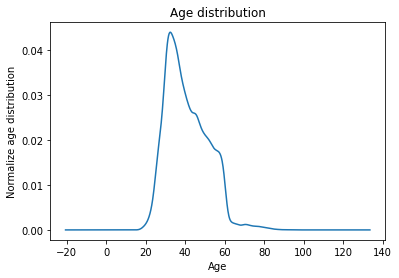

In [38]:
## Density plot
bankNumeric['age'].plot(kind = 'density', subplots = False, layout = (1,1))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Normalize age distribution')
pyplot.show()

In [39]:
## Standardize data

from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
scaling = StandardScaler().fit(bankNumeric)
rescaledNum = scaling.transform(bankNumeric)
set_printoptions(precision = 3)
print(rescaledNum)

[[ 1.607  0.256 -1.298 ... -0.411 -0.252  1.184]
 [ 0.289 -0.438 -1.298 ... -0.411 -0.252  0.68 ]
 [-0.747 -0.447 -1.298 ... -0.411 -0.252 -0.856]
 ...
 [ 2.925  1.43   0.143 ...  1.436  1.05  -0.584]
 [ 1.513 -0.228  0.143 ... -0.411 -0.252 -0.824]
 [-0.371  0.528  0.143 ...  1.476  4.524 -0.715]]


In [40]:
## normlize data
from sklearn.preprocessing import Normalizer

normaliser = Normalizer().fit(bankNumeric)
normalisedNum = normaliser.transform(bankNumeric)
set_printoptions(precision = 3)
print(normalisedNum)

[[ 2.686e-02  9.923e-01  2.315e-03 ... -4.630e-04  0.000e+00  1.068e-03]
 [ 2.750e-01  1.812e-01  3.124e-02 ... -6.249e-03  0.000e+00  1.142e-02]
 [ 3.974e-01  2.408e-02  6.021e-02 ... -1.204e-02  0.000e+00  4.385e-03]
 ...
 [ 1.235e-02  9.805e-01  2.917e-03 ...  3.157e-02  5.147e-04  1.070e-04]
 [ 6.775e-02  7.940e-01  2.021e-02 ... -1.189e-03  0.000e+00  4.688e-04]
 [ 1.234e-02  9.906e-01  5.668e-03 ...  6.269e-02  3.668e-03  1.664e-04]]


In [41]:
## Logistic regression
# Converting all the categorical variables to dummy variables
bankCat = pd.get_dummies(bankData[['job','marital','education','default','housing','loan','contact','month','poutcome']])
bankCat.shape

(45211, 44)

In [42]:
# Seperating the numerical variables
bankNum = bankData[['age','balance','day','duration','campaign','pdays','previous']]
bankNum.shape

(45211, 7)

In [43]:
# Preparing the X variables
X = pd.concat([bankCat, bankNum], axis=1)
print(X.shape)
# Preparing the Y variable
Y = bankData['y']
print(Y.shape)
X.head()

(45211, 51)
(45211,)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,58,2143,5,261,1,-1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,44,29,5,151,1,-1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,33,2,5,76,1,-1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,47,1506,5,92,1,-1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,33,1,5,198,1,-1,0


In [44]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [45]:
# Defining the LogisticRegression function
bankModel = LogisticRegression()
bankModel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
pred = bankModel.predict(X_test)
print('Accuracy of Logisticr regression model prediction on test set: {:.2f}'.format(bankModel.score(X_test, y_test)))

Accuracy of Logisticr regression model prediction on test set: 0.89


In [47]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

[[11754   244]
 [ 1242   324]]


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     11998
         yes       0.57      0.21      0.30      1566

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



In [49]:
## Categorical to dummy varialbes

bankCat = pd.get_dummies(bankData[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']])
bankCat.shape

(45211, 44)

In [50]:
bankNum = bankData[['age','balance','day','duration','campaign','pdays','previous']]
X = pd.concat([bankCat, bankNum], axis = 1)
print(X.shape)

(45211, 51)


In [51]:
Y = bankData['y']
print(Y.shape)


(45211,)


In [52]:
X.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,58,2143,5,261,1,-1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,44,29,5,151,1,-1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,33,2,5,76,1,-1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,47,1506,5,92,1,-1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,33,1,5,198,1,-1,0


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [54]:
bankModel = LogisticRegression()
bankModel.fit(X_train, y_train)
pred = bankModel.predict(X_test)

print('Accuracy of Logisticr regression model prediction on test set: {:.2f}'.format(bankModel.score(X_test, y_test)))

Accuracy of Logisticr regression model prediction on test set: 0.89


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

[[11754   244]
 [ 1242   324]]


In [56]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     11998
         yes       0.57      0.21      0.30      1566

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564

